In [62]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

Found 5417 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

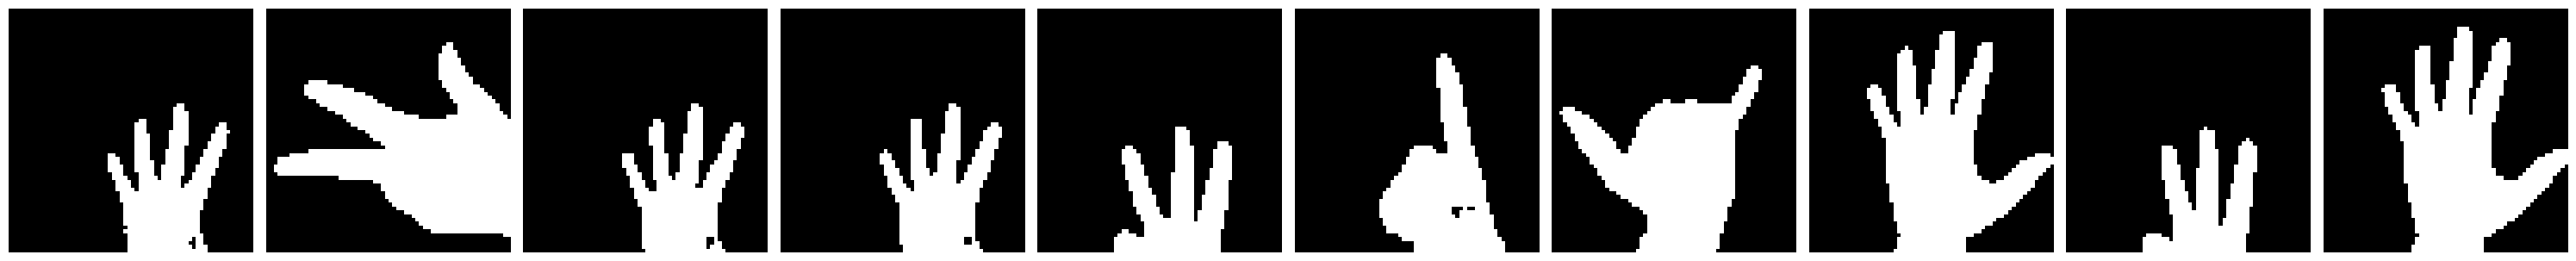

(10, 64, 64, 3)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [69]:
train_path = r'E:\VIT\5 sem\CSE3016 - Computer Graphics & Multimedia\project\Sign Language Interpreter (Final)\gesture\train'
test_path = r'E:\VIT\5 sem\CSE3016 - Computer Graphics & Multimedia\project\Sign Language Interpreter (Final)\gesture\test'

# TESTING OF ONLY ONE IMAGE

# train_path = r'E:\VIT\5 sem\CSE3016 - Computer Graphics & Multimedia\project\data_flair_code\gesture\img_train'
# test_path = r'E:\VIT\5 sem\CSE3016 - Computer Graphics & Multimedia\project\data_flair_code\gesture\img_test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

imgs, labels = next(train_batches)


#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

In [70]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation ="softmax"))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 128)       

In [71]:
# model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
# early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.05)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [72]:
history2 = model.fit(train_batches, epochs=20,  validation_data = test_batches)#, checkpoint])


Epoch 1/20
542/542 [==============================] - 26s 46ms/step - loss: 0.6685 - accuracy: 0.8191 - val_loss: 1.9497 - val_accuracy: 0.4575
Epoch 2/20
542/542 [==============================] - 33s 61ms/step - loss: 0.1841 - accuracy: 0.9308 - val_loss: 1.9131 - val_accuracy: 0.5175
Epoch 3/20
542/542 [==============================] - 33s 60ms/step - loss: 0.1377 - accuracy: 0.9450 - val_loss: 2.1224 - val_accuracy: 0.5375
Epoch 4/20
542/542 [==============================] - 27s 50ms/step - loss: 0.1257 - accuracy: 0.9494 - val_loss: 2.0779 - val_accuracy: 0.5350
Epoch 5/20
542/542 [==============================] - 28s 53ms/step - loss: 0.1144 - accuracy: 0.9526 - val_loss: 2.0862 - val_accuracy: 0.5600
Epoch 6/20
542/542 [==============================] - 28s 51ms/step - loss: 0.1122 - accuracy: 0.9502 - val_loss: 2.1179 - val_accuracy: 0.5950
Epoch 7/20
542/542 [==============================] - 24s 45ms/step - loss: 0.1053 - accuracy: 0.9531 - val_loss: 2.0926 - val_accuracy:

In [82]:
imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=1)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


model.save('best_model.h5')

1/1 [==============================] - 0s 23ms/step - loss: 1.0764 - accuracy: 0.9000
loss of 1.0763587951660156; accuracy of 89.99999761581421%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


predictions on a small set of test data--

Nine   Six   Five   Two   Nine   Nine   Nine   One   Seven   Nine   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


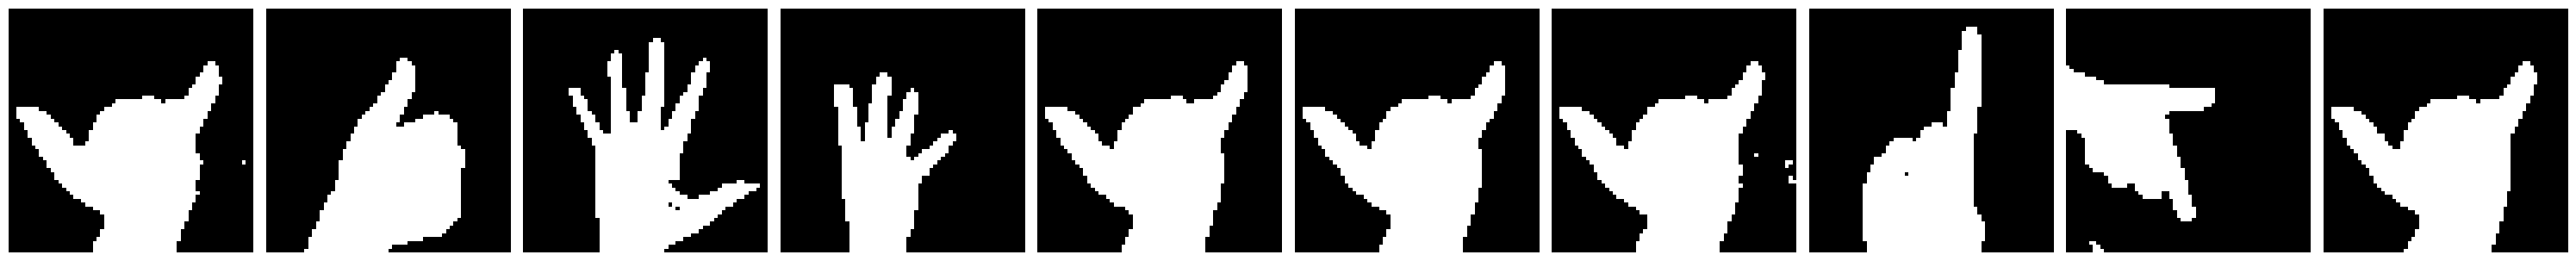

Actual labels
Nine   Six   Five   Four   Nine   Nine   Nine   One   Seven   Nine   (10, 64, 64, 3)


In [83]:
# imgs, labels = next(test_batches)

# model = keras.models.load_model(r"best_model.h5")

# scores = model.evaluate(imgs, labels, verbose=0)
# print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

# model.summary()

# scores #[loss, accuracy] on test data...
# model.metrics_names


word_dict = {0:'One',1:'Ten',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine'}

predictions = model.predict(imgs, verbose=0)
print("predictions on a small set of test data--")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

print(imgs.shape)

# history2.history